# lec02_basic_model_회귀

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf

In [2]:
import pandas_profiling

# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [3]:
df = pd.read_csv("../ML/datasets/boston.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# ML

In [4]:
y = df["MEDV"]
X = df.drop("MEDV", axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [6]:
ri=Ridge(alpha = 1.0, random_state=1)
ri.fit(X_train,y_train)
pred = ri.predict(X_test)
sc = mean_squared_error(y_test, pred, squared=False)
sc

4.487205208451956

# DL

## seed 고정

In [7]:
tf.random.set_seed(1)
np.random.seed(1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
len(X_train.columns)

13

## activation_function

<pre>
* activation_function(활성함수) ref : https://keras.io/api/layers/activations/
    - relu function    : 기울기 소실 문제 완화
    - sigmoid function
    - softmax function
    - softplus function
    - softsign function
    - tanh function
    - selu function
    - elu function
    - exponential function
-----------------------------------------------------------------------------
from tensorflow.keras import activations as act
act.relu


from keras import activations as act
act.relu()
act.sigmoid()
act.softmax()
act.tanh()

## 사용자 정의 metrics

In [10]:
import tensorflow as tf
from keras.optimizers import Adam  
from keras.losses import MeanSquaredError

@tf.function
def my_mse_def(y_true, y_pred):
    return -1 * keras.losses.MSE(y_true, y_pred)

model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=26 , activation='relu'))
model.add(Dense(units=12 , activation='relu'))
model.add(Dense(units=8  , activation='relu'))
model.add(Dense(units=4  , activation='relu'))
model.add(Dense(units=1  ))                                 # 최종 출력층 활성함수 필요 X, 회귀식의 해 그 자체가 답안

model.compile(loss=my_mse_def,
              optimizer=Adam(lr=0.001),
              metrics=[tf.keras.losses.MeanSquaredError()])


In [11]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation="relu"))
model.add(Dense(units=28, activation="relu"))
model.add(Dense(units=14, activation="relu"))
model.add(Dense(units=7, activation="relu"))
model.add(Dense(units=1))                                 # 최종 출력층 활성함수 필요 X, 회귀식의 해 그 자체가 답안
model.compile(loss="mse" ,optimizer="adam", metrics="mse")


<pre>
* loss(ref : https://keras.io/api/losses/)
    * Probabilistic losses
        - categorical_cross_entropy
        - binary_cross_entropy
        - sparse_categorical_cross_entropy
    * Regression losses
        - mse, mae, rmse
    * Hinge losses for "maximum-margin" classification
        - Hinge class.....

* optimizer(ref : https://keras.io/api/optimizers/)
    - Gradient Descent
    - Statistic Gradient Descent
    - Momentum
    - AdaGrade
    - Adam
    - Rmsprop

* metrics(ref : https://keras.io/api/metrics/) >> loss_function과 동일하면 metrics를 생략한다
    - Probabilistic metrics : Crossentropy ...
    - Regression metrics : MeanSquaredError ... 
    - Hinge metrics for "maximum-margin" classification
   
    - Accuracy metrics : Accuracy ...
    - Classification metrics based on True/False : AUC, Precision ...
    - Image segmentation metrics
   

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 56)                784       
                                                                 
 dense_8 (Dense)             (None, 28)                1596      
                                                                 
 dense_9 (Dense)             (None, 14)                406       
                                                                 
 dense_10 (Dense)            (None, 7)                 105       
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 2,899
Trainable params: 2,899
Non-trainable params: 0
_________________________________________________________________


## 모델 sequential()

### hidden layers

In [13]:
model.layers[0].output

<KerasTensor: shape=(None, 56) dtype=float32 (created by layer 'dense_7')>

In [14]:
model.get_layer("dense_7").output

<KerasTensor: shape=(None, 56) dtype=float32 (created by layer 'dense_7')>

In [15]:
model.input

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'dense_7_input')>

In [16]:
# new_weight = [-3.59945893e-02, -7.81407952e-01, -9.94988620e-01,
#          2.31664270e-01,  7.15312585e-02,  2.73251176e-01,
#         -7.16678500e-01, -1.04593381e-01, -3.73264551e-01,
#         -1.35154331e+00, -7.71160424e-02, -8.01578313e-02,
#         -2.47413181e-02,  4.07953672e-02, -8.12054157e-01,
#          2.06902325e-02,  2.68863082e-01, -2.85769194e-01,
#         -9.34480608e-01, -1.85810834e-01, -2.36392990e-01,
#          3.95404011e-01, -7.05395699e-01, -1.06700659e-01,
#         -1.37634230e+00, -4.02684540e-01, -4.22928900e-01,
#          4.36127841e-01,  1.88437402e-01, -5.92378318e-01,
#         -6.82436585e-01, -1.41891348e+00,  2.25938618e-01,
#         -6.25301898e-01, -2.77668208e-01,  6.19773328e-01,
#         -1.26197302e+00,  4.22708660e-01, -4.06042337e-01,
#          6.42318368e-01,  3.16185653e-02,  2.19408333e-01,
#         -1.13330293e+00,  2.66330421e-01,  2.87996888e-01,
#          4.02136564e-01, -3.89193267e-01, -2.75454968e-01,
#         -2.69724280e-01,  5.66687584e-01, -9.84383225e-02,
#         -2.73523718e-01,  2.54848242e-01, -8.64827514e-01,
#         -5.67164361e-01, -5.86636007e-01]
# model.set_weights(new_weight)

In [17]:
from keras import Model

hidden_layer1_model = Model(inputs = model.input, outputs = model.layers[0].output)
output = hidden_layer1_model(X_train.values)
output



print(f"input : {X_train[:1]}")
print(f"output : {output[:1]}")

print(f"output = hidden_layer1_model weight : {hidden_layer1_model.get_weights()[:1]}")


input :        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
242  0.1029  30.0   4.93   0.0  0.428  6.358  52.9  7.0355  6.0  300.0   

     PTRATIO       B  LSTAT  
242     16.6  372.75  11.22  
output : [[148.38249    54.25223    40.272953    0.        173.76118    32.48347
    0.          0.          0.          0.         20.107855   51.367874
  147.70496    52.48611    21.646706    0.          0.          6.2393804
   70.42679     0.          0.          0.          0.          0.
    0.          0.          0.        107.50071     0.        116.467926
   86.34802     0.         21.04859     0.          0.        133.83568
    0.         26.515331    0.         56.355022    0.          0.
   37.08501    45.587467   64.49103   138.59418     0.8235813   0.
   63.8159      0.         25.361944    0.         40.463253   79.87389
   10.901254    0.       ]]
output = hidden_layer1_model weight : [array([[ 0.09411627, -0.24620235, -0.23492754,  0.17741072, -0.0931295

### 배치 정규화
<pre>
* Xavier 배치 정규화
keras.initializers.glorot_normal(seed=None)
stddev = 1 / sqrt(fan_in)
sigmoid

* HE 배치 정규화
keras.initializers.he_normal(seed=None)
stddev = sqrt(2 / fan_in)
relu

In [32]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation="relu"
                , kernel_initializer = "GlorotNormal"))   #  배치 정규화 >> 갈수록 w편중, 소실 문제 완화
model.add(Dense(units=28, activation="relu"))
model.add(Dense(units=14, activation="relu"))
model.add(Dense(units=7, activation="relu"))
model.add(Dense(units=1))                                 # 최종 출력층 활성함수 필요 X, 회귀식의 해 그 자체가 답안
model.compile(loss="mse" ,optimizer="adam", metrics="mse")
model.fit(x=X,y=y,batch_size = 5,epochs = 10)

Epoch 1/10
102/102 [==============================] - 1s 1ms/step - loss: 179.9475 - mse: 179.9475
Epoch 2/10
102/102 [==============================] - 0s 1ms/step - loss: 74.7160 - mse: 74.7160
Epoch 3/10
102/102 [==============================] - 0s 1ms/step - loss: 66.2575 - mse: 66.2575
Epoch 4/10
102/102 [==============================] - 0s 1ms/step - loss: 63.9184 - mse: 63.9184
Epoch 5/10
102/102 [==============================] - 0s 1ms/step - loss: 68.9792 - mse: 68.9792
Epoch 6/10
102/102 [==============================] - 0s 1ms/step - loss: 56.5769 - mse: 56.5769
Epoch 7/10
102/102 [==============================] - 0s 1ms/step - loss: 57.8049 - mse: 57.8049
Epoch 8/10
102/102 [==============================] - 0s 1ms/step - loss: 57.3837 - mse: 57.3837
Epoch 9/10
102/102 [==============================] - 0s 1ms/step - loss: 50.6693 - mse: 50.6693
Epoch 10/10
102/102 [==============================] - 0s 1ms/step - loss: 53.6500 - mse: 53.6500


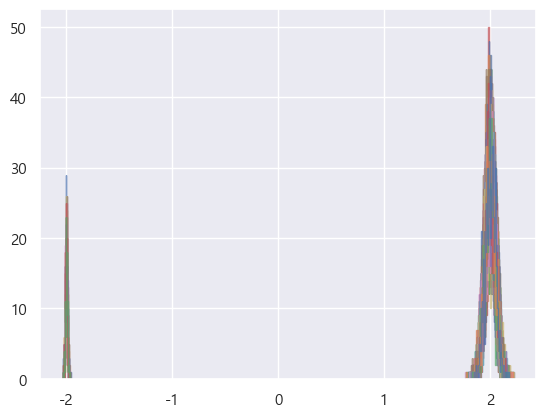

In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=2.0, stddev=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-2.0, stddev=0.01, seed=None)

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model1.get_weights()
# print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()
# 은닉층 뒤로 갈수록 웨이트 편중되고 소실되는 특성이 있다

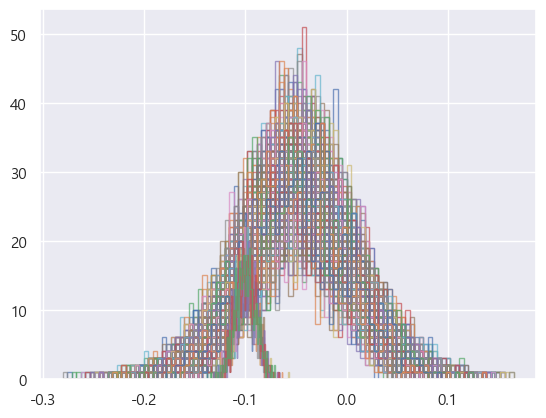

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=-0.05, stddev=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-0.1, stddev=0.01, seed=None)

model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

weights = model2.get_weights()
# print(weights)

plt.hist(weights[0], bins=100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins=100, alpha=0.7, histtype='step')
plt.show()
# 웨이트 정규분포화 > 웨이트 골고루 > 다양하게 학습

ref : https://keras.io/api/models/model/

### 모델 저장 & 불러오기

#### save() / save_weights()
* fit 한 이후에 저장
* save()         : 모델구조 + 보정된 w
    - 바로 사용이 가능
    - 저장 용량이 크다

* save_weights() : 보정된 w 
    - 모델 구조를 알고 있어야만 사용
    - 저장 용량이 적다


#### model + 가중치
* model.save("aaa.h5")
* re_model = load_model("aaa.h5")

In [21]:
y = df["MEDV"]
X = df.drop("MEDV", axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [23]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation="relu"))
model.add(Dense(units=28, activation="relu"))
model.add(Dense(units=14, activation="relu"))
model.add(Dense(units=7, activation="relu"))
model.add(Dense(units=1))                                 # 최종 출력층 활성함수 필요 X, 회귀식의 해 그 자체가 답안
model.compile(loss="mse" ,optimizer="adam", metrics="mse")
model.fit(x=X,y=y,batch_size = 5,epochs = 50,steps_per_epoch=91)

Epoch 1/50
91/91 [==============================] - 1s 2ms/step - loss: 85.7957 - mse: 85.7957
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 66.1607 - mse: 66.1607
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 60.2283 - mse: 60.2283
Epoch 4/50
91/91 [==============================] - 0s 1ms/step - loss: 51.0279 - mse: 51.0279
Epoch 5/50
91/91 [==============================] - 0s 1ms/step - loss: 57.3111 - mse: 57.3111
Epoch 6/50
91/91 [==============================] - 0s 1ms/step - loss: 53.0064 - mse: 53.0064
Epoch 7/50
91/91 [==============================] - 0s 1ms/step - loss: 45.5223 - mse: 45.5223
Epoch 8/50
91/91 [==============================] - 0s 1ms/step - loss: 48.3127 - mse: 48.3127
Epoch 9/50
91/91 [==============================] - 0s 1ms/step - loss: 51.3517 - mse: 51.3517
Epoch 10/50
91/91 [==============================] - 0s 1ms/step - loss: 42.9767 - mse: 42.9767
Epoch 11/50
91/91 [==============================

In [24]:
from keras.models import load_model


model.evaluate(X_test, y_test)
model.save("./lec02_my_model.h5")
model.save_weights("./lec02_my_weight.h5")
re_model = load_model("./lec02_my_model.h5")
re_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 16.4440 - mse: 16.4440


[16.44402503967285, 16.44402503967285]

#### 가중치
* model.save_weights("my_weight")
* re_weights = load_weights("my_weight")
* model.set_weights(re_weights)

In [25]:
model = Sequential()
model.add(Dense(units=56, input_dim=len(X_train.columns), activation="relu"))
model.add(Dense(units=28, activation="relu"))
model.add(Dense(units=14, activation="relu"))
model.add(Dense(units=7, activation="relu"))
model.add(Dense(units=1))                                 # 최종 출력층 활성함수 필요 X, 회귀식의 해 그 자체가 답안
model.compile(loss="mse" ,optimizer="adam", metrics="mse")
model.fit(x=X,y=y,batch_size = 5,epochs = 50,steps_per_epoch=91)


model.load_weights("./lec02_my_weight.h5")
model.evaluate(X_test, y_test)

Epoch 1/50
91/91 [==============================] - 1s 2ms/step - loss: 470.9099 - mse: 470.9099
Epoch 2/50
91/91 [==============================] - 0s 1ms/step - loss: 96.0207 - mse: 96.0207
Epoch 3/50
91/91 [==============================] - 0s 1ms/step - loss: 69.8296 - mse: 69.8296
Epoch 4/50
91/91 [==============================] - 0s 1ms/step - loss: 61.6557 - mse: 61.6557
Epoch 5/50
91/91 [==============================] - 0s 1ms/step - loss: 66.0880 - mse: 66.0880
Epoch 6/50
91/91 [==============================] - 0s 1ms/step - loss: 58.2824 - mse: 58.2824
Epoch 7/50
91/91 [==============================] - 0s 1ms/step - loss: 53.5481 - mse: 53.5481
Epoch 8/50
91/91 [==============================] - 0s 2ms/step - loss: 58.3733 - mse: 58.3733
Epoch 9/50
91/91 [==============================] - 0s 2ms/step - loss: 55.4490 - mse: 55.4490
Epoch 10/50
91/91 [==============================] - 0s 1ms/step - loss: 51.4384 - mse: 51.4384
Epoch 11/50
91/91 [============================

[16.44402503967285, 16.44402503967285]

## fit()

<pre>
Model.fit(
    x=None,                     : 문제지
    y=None,                     : 답안지
    
    batch_size=20,              : 역전파 횟수 <b>(회귀계수 보정 단위) </b>
    initial_epoch=0,            : epoch 시작 횟수(거의 변경 X)
    epochs=3,                   : <b>학습 반복 횟수</b>
    steps_per_epoch=None,       : <b>샘플수/batch_size (최대 회귀계수 보정 횟수)</b>
    
    verbose="auto",       
    callbacks=None,             : <b>(stop, save) // (overfitting 나면, 여러 사유로 학습이 중단되면)</b>
    
    
    validation_split=0.2,       : 0.2% 검증에 사용 
    validation_data=None,       : validation_split OR validation_data 둘 중에 하나만 사용
    validation_batch_size=None, (=batch_size)
    validation_steps=None,      (steps_per_epoch)
    validation_freq=1,
    
    
    shuffle=True,
    class_weight=None, 
    sample_weight=None,

    
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

### batch_size, epochs 조정(train만)

In [26]:
model = load_model("./lec02_my_model.h5")
model.fit(x=X,y=y,batch_size = 5,epochs = 50,steps_per_epoch=91)
# X,y 통째로 넣고 train점수만 본다 >> 오버피팅 확인 불가

Epoch 1/50
91/91 [==============================] - 1s 1ms/step - loss: 22.5450 - mse: 22.5450
Epoch 2/50
91/91 [==============================] - 0s 1ms/step - loss: 22.2191 - mse: 22.2191
Epoch 3/50
91/91 [==============================] - 0s 1ms/step - loss: 22.6790 - mse: 22.6790
Epoch 4/50
91/91 [==============================] - 0s 1ms/step - loss: 16.8592 - mse: 16.8592
Epoch 5/50
91/91 [==============================] - 0s 1ms/step - loss: 22.8089 - mse: 22.8089
Epoch 6/50
91/91 [==============================] - 0s 1ms/step - loss: 21.5589 - mse: 21.5589
Epoch 7/50
91/91 [==============================] - 0s 1ms/step - loss: 16.7768 - mse: 16.7768
Epoch 8/50
91/91 [==============================] - 0s 1ms/step - loss: 17.0601 - mse: 17.0601
Epoch 9/50
91/91 [==============================] - 0s 1ms/step - loss: 24.5956 - mse: 24.5956
Epoch 10/50
91/91 [==============================] - 0s 1ms/step - loss: 21.2714 - mse: 21.2714
Epoch 11/50
91/91 [==============================

### batch_size, epochs 조정(train + test)
* 어느 정도 일반화 학습

In [27]:
model.fit(x=X,y=y,validation_split=0.2, batch_size = 5,epochs = 50,steps_per_epoch=91)
# validation 점수도 확인 가능
# model.fit(x=X_train,y=y_,validation_data=(X_train, X_test), batch_size = 5,epochs = 50,steps_per_epoch=91)


Epoch 1/50
91/91 [==============================] - 0s 3ms/step - loss: 19.2768 - mse: 19.2768 - val_loss: 14.6889 - val_mse: 14.6889
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 20.4933 - mse: 20.4933 - val_loss: 15.7033 - val_mse: 15.7033
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 17.8378 - mse: 17.8378 - val_loss: 14.3440 - val_mse: 14.3440
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 21.3150 - mse: 21.3150 - val_loss: 14.2294 - val_mse: 14.2294
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 17.9293 - mse: 17.9293 - val_loss: 15.6686 - val_mse: 15.6686
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 24.0893 - mse: 24.0893 - val_loss: 13.2772 - val_mse: 13.2772
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 16.0270 - mse: 16.0270 - val_loss: 14.4661 - val_mse: 14.4661
Epoch 8/50
91/91 [==============================] - 0s 2ms/ste

### learning_rate 조정
* optimizer 속성
* wt+1=wt−γ⋅∇L(wt) >> γ로 표현 / 얼만큼 학습할지 또는 산을 내려가는 비유에서는 한 걸음 보폭을 얼만큼으로 할지를 나타내는 learning rate입니다.

In [28]:
from keras.optimizers import Adam

model.compile(loss="mse" ,optimizer=Adam(learning_rate=0.001), metrics="mse")
model.fit(x=X,y=y,validation_split=0.2, batch_size = 5, epochs = 50,  steps_per_epoch=91)

Epoch 1/50
91/91 [==============================] - 1s 3ms/step - loss: 16.4205 - mse: 16.4205 - val_loss: 19.7350 - val_mse: 19.7350
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 16.0145 - mse: 16.0145 - val_loss: 20.6317 - val_mse: 20.6317
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 15.6476 - mse: 15.6476 - val_loss: 19.3311 - val_mse: 19.3311
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 19.8004 - mse: 19.8004 - val_loss: 27.0306 - val_mse: 27.0306
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 16.4408 - mse: 16.4408 - val_loss: 21.8180 - val_mse: 21.8180
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 20.7258 - mse: 20.7258 - val_loss: 17.4218 - val_mse: 17.4218
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 13.3810 - mse: 13.3810 - val_loss: 13.3595 - val_mse: 13.3595
Epoch 8/50
91/91 [==============================] - 0s 2ms/ste

In [29]:
model.compile(loss="mse" ,optimizer=Adam(learning_rate=0.1), metrics="mse")
model.fit(x=X,y=y,validation_split=0.2, batch_size = 5, epochs = 50,  steps_per_epoch=91)

Epoch 1/50
91/91 [==============================] - 1s 4ms/step - loss: 1195.1752 - mse: 1195.1752 - val_loss: 175.1399 - val_mse: 175.1399
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 393.7238 - mse: 393.7238 - val_loss: 68.7191 - val_mse: 68.7191
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 245.6102 - mse: 245.6102 - val_loss: 29.4958 - val_mse: 29.4958
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 144.0090 - mse: 144.0090 - val_loss: 30.4853 - val_mse: 30.4853
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 108.9651 - mse: 108.9651 - val_loss: 46.0470 - val_mse: 46.0470
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 93.9413 - mse: 93.9413 - val_loss: 63.5385 - val_mse: 63.5385
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 83.8406 - mse: 83.8406 - val_loss: 75.7551 - val_mse: 75.7551
Epoch 8/50
91/91 [==============================

## evaluate()

In [30]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 96.8104 - mse: 96.8104


[96.81037139892578, 96.81037139892578]

## predict()

In [31]:
# proba=model.predict(test_csv)